### Multiclass classification using Keras

Build a network to classify Reuters newswires into 46 mutually exclusive topics. The problem is single-label multiclass classification.

Dataset - Reuters containing 46 different topics.

Dataset has already been pre-processed using bag of words technique

In [0]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)
print(len(train_data),len(test_data))

8982 2246


Vectorize the training data using one-hot encoding

In [0]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


Vectorize categorical using one hot encoding as well. Other way would be to create an integer list with a mapping to each categorical label.

If integer list is used to encode categorical labels, then the loss function 'sparse_categorical_crossentropy' should be used

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Create a validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Since we have 46 output classes we will need layers larger than 16 units in size.  Avoid hidden layers having less than 46 units as this will create an information bottleneck and affect performance.

End the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dim vector. Each entry in this vector will encode probability for a different output class.

The values of the 46 dim vector will sum to 1

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 453us/step - loss: 2.6102 - acc: 0.5287 - val_loss: 1.6778 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.3994 - acc: 0.7035 - val_loss: 1.2831 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.0562 - acc: 0.7676 - val_loss: 1.1193 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8303 - acc: 0.8211 - val_loss: 1.0192 - val_acc: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.6645 - acc: 0.8602 - val_loss: 0.9665 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.5311 - acc: 0.8916 - val_loss: 0.9177 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.4298 - acc: 0.

Plot the training and validation loss

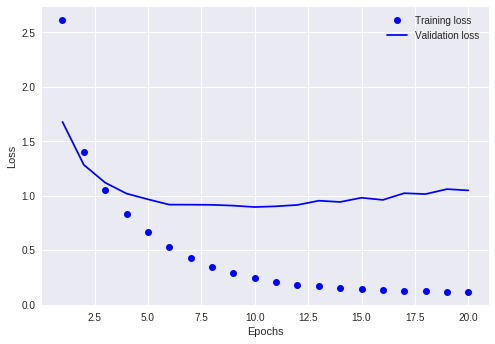

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the training and validation accuracy


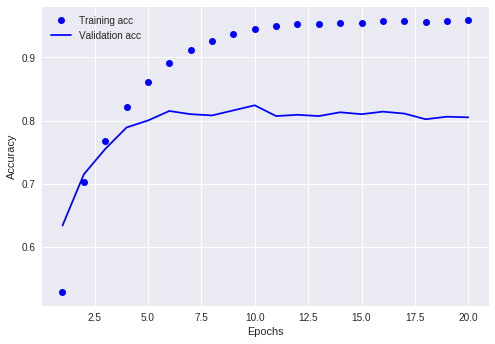

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label ='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set

In [0]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val,y_val))

results = model.evaluate(x_test,one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 109us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 74us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.8180 - acc: 0.8322 - val_loss: 1.0270 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 81us/step - loss: 0.6507 - acc: 0.8629 - val_loss: 0.9513 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.5297 - acc: 0.8904 - val_loss: 0.9206 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.4213 - acc: 0.9113 - val_loss: 0.9006 - val_acc: 0.8140
Epoch 8/9
798

This approach reaches an accuracy of ~80%. Let's generate predictions on test data

In [0]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)